# Business Case 1: To prepare a complete Data Analysis Report using Flight Price Prediction Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# Copying data set to keep as Back-up

df_Backup = df.copy()

## **Domain Analysis**
1. **Airline:**
   This column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2. **Date_of_Journey:**
   This column will let us know about the date on which the passenger’s journey will start.
3. **Source:**
   This column holds the name of the place from where the passenger’s journey will start.       
4. **Destination:**
   This column holds the name of the place to where passengers wanted to travel.
5. **Route:**
   This column tells what is the route through which passengers have opted to travel from his/her source to their destination.
6. **Dep_Time:**
   Departure time is when the flight will depart from the source.
7. **Arrival_Time:**
   Arrival time is when the passenger will reach his/her destination.
8. **Duration:**
   Duration is the whole period that a flight will take to complete its journey from source to destination.
9. **Total_Stops:**
   This will let us know in how many places flights will stop there for the flight in the whole journey.
10. **Additional_Info:**
    In this column, we will get information about food, kind of food, and other amenities.
11. **Price:**
    Price of the flight for a complete journey including all the expenses before onboarding.                

## Basic Checks and Statistical Analysis

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.shape

(10683, 11)

## Observation

There are 11 features (columns) and 10683 records (rows) in the Flight Fare data set.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


## Observation:

- There are 10 features belonging to Object data type.
- Only the Target variable 'Price' is Integer type.
- There is only 1 missing record present in 'Route' column and 1 in 'Total_Stops' column.

In [7]:
#statistical analysis for Numerical Data

df.describe()

,Date_of_Journey,Price
count,10683,10683.000000
mean,2019-05-04 19:56:41.853412096,9087.064121
min,2019-03-01 00:00:00,1759.000000
25%,2019-03-27 00:00:00,5277.000000
50%,2019-05-15 00:00:00,8372.000000
75%,2019-06-06 00:00:00,12373.000000
max,2019-06-27 00:00:00,79512.000000
std,NaN,4611.359167


## Observation

- No constant Data
- No corrupt Data

In [8]:
# Statistical Analysis for Categorical Data

df.describe(include = 'O')

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4537,4537,2376,233,423,550,5625,8345


## Observation

- No constant Data

## Exploratory Data Analysis
**Univariate Analysis - Sweetviz Report**

In [9]:
# Installation

!pip install sweetviz


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Feature: Price                               |█████████████████████████████████████▌   | [ 92%]   00:02 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

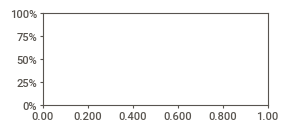

In [10]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

## Count plot
MOST PREFERRED AIRLINE

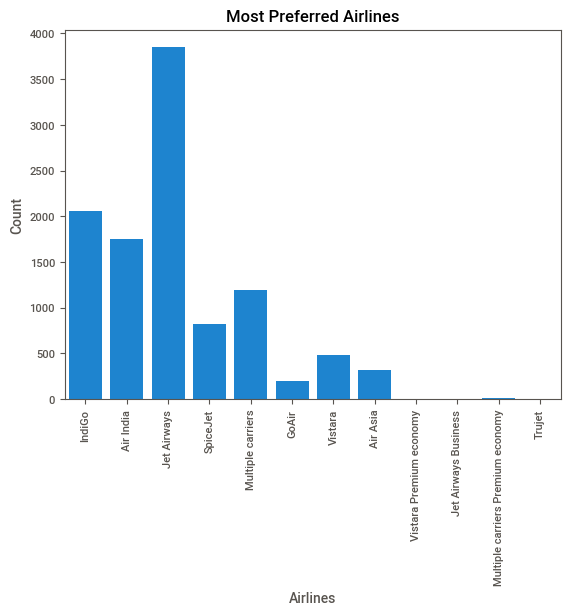

In [11]:
sns.countplot(x = 'Airline', data = df)

plt.title('Most Preferred Airlines', fontsize = 12, color = 'black')
plt.xlabel('Airlines', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- Jet Airways is the most preferred airline with approximately 3800 counts.
- Second most preferred Airline is Indigo with nearly 2100 counts.
- Jet Airways Business, Vistara Premium Economy, Multiple Carriers Premium economy and Trujet are the least preferred airlines.

## MOST PREFERRED SOURCE

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

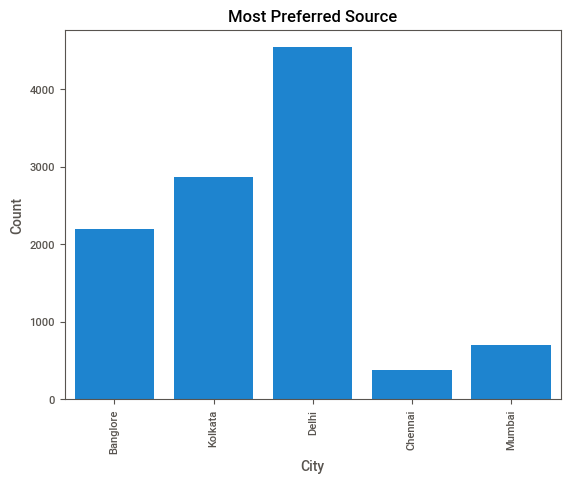

In [12]:
sns.countplot(x = 'Source', data = df)

plt.title('Most Preferred Source', fontsize = 12, color = 'black')
plt.xlabel('City', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)


## Observations:

- From the Plot, it can be seen that the Most desired Source (Departure station), is Delhi with a count of almost 4500 passengers.
- And the least preferred Source station is Chennai with a count of nearly 300 passengers.

## Most Preferred Destination

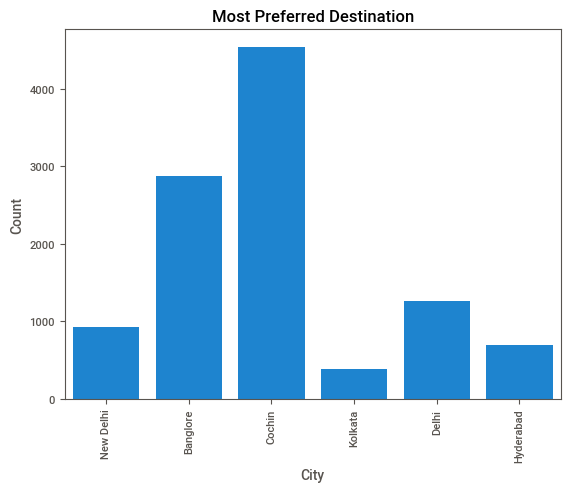

In [13]:
sns.countplot(x = 'Destination', data = df)

plt.title('Most Preferred Destination', fontsize = 12, color = 'black')
plt.xlabel('City', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- From the plot it can be inferred that the Most Preferred Destination is Cochin city with a count of almost 4500 passengers.
- And Kolkata is the least preferred city among all with nearly 400 passengers.

## TOP 10 MOST PREFERRED ROUTE FOR TRAVEL

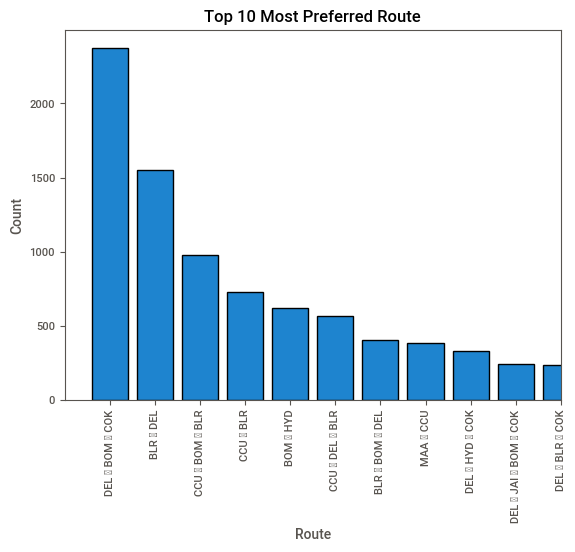

In [14]:
sns.countplot(x = 'Route', data = df, order = df['Route'].value_counts().index, ec = 'black')

plt.title('Top 10 Most Preferred Route', fontsize = 12, color = 'black')
plt.xlabel('Route', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)

plt.show()

## Observation:

- Most Preferred Route is DEL → BOM → COK with a count of nearly 3000 followed by BLR → DEL

## MOST NUMBER OF TOTAL_STOPS PREFERRED

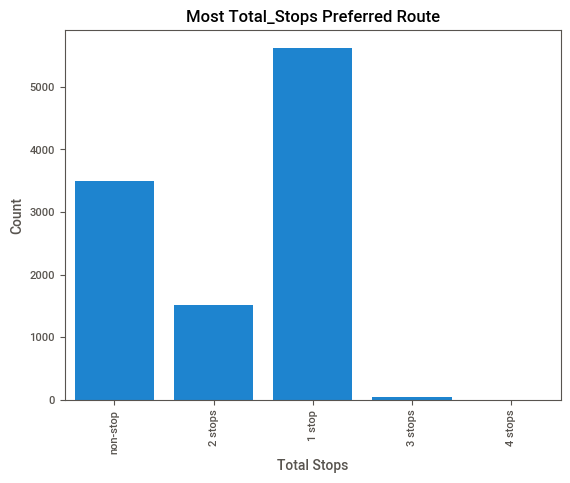

In [15]:
sns.countplot(x = 'Total_Stops', data = df)

plt.title('Most Total_Stops Preferred Route', fontsize = 12, color = 'black')
plt.xlabel('Total Stops', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- From the plot, we can see that passengers preferred airlines route with 1 stop most with a count of almost 5800, followed by non-stop airline route.
- Passengers avoid 3 stops or 4 stops airline route.

## Most Treavelled Date

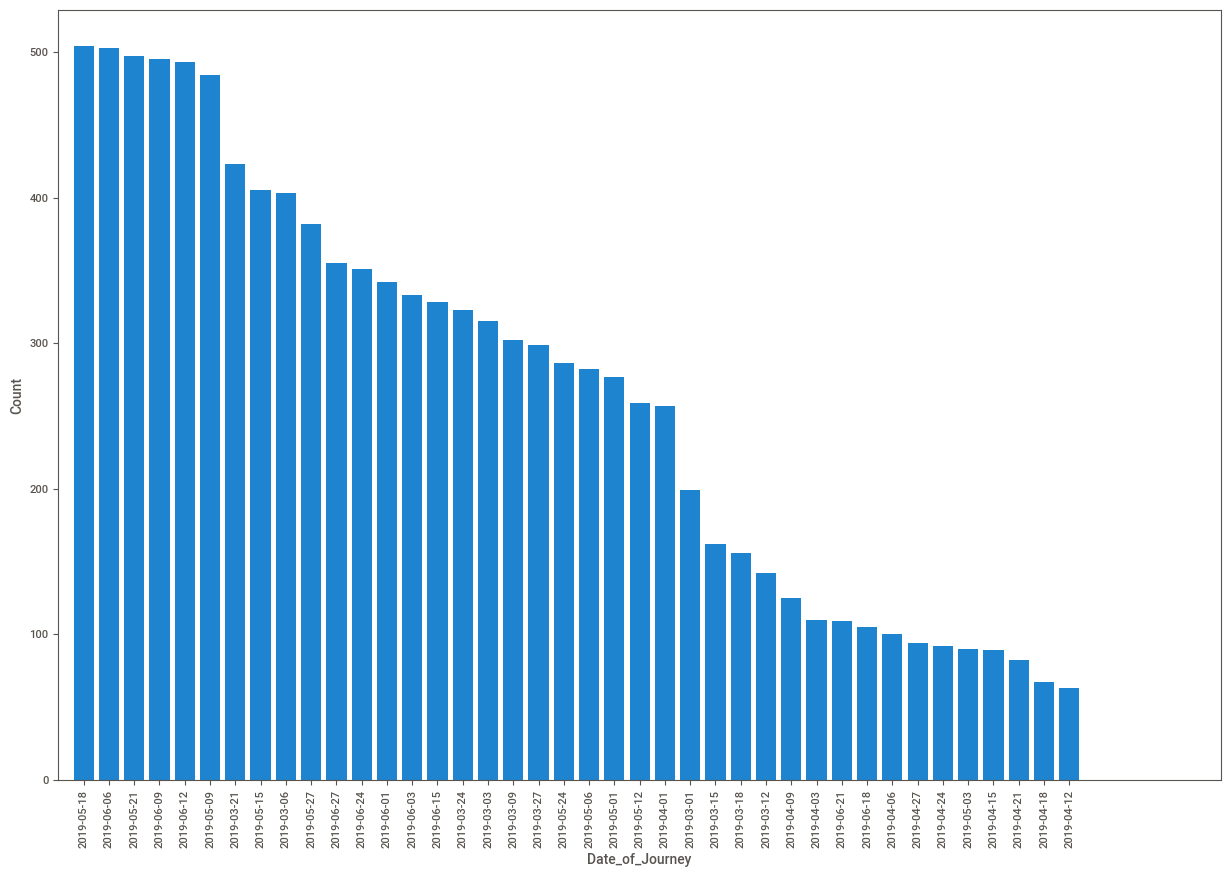

In [16]:
plt.figure(figsize = (15, 10))

# Create a countplot to visualize the frequency of flights on different dates
sns.countplot(x = 'Date_of_Journey', data = df, order = df['Date_of_Journey'].value_counts().index)

# Set x-axis and y-axis labels
plt.xlabel('Date_of_Journey', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 90)

# Show the plot
plt.gca().invert_xaxis()  # Invert the x-axis to display dates in descending order

# Limit the number of displayed dates on the x-axis if needed
plt.xlim(-1, 45)

# Show the plot
plt.show()

## Observations:

- The number of passengers are highter on 18-05-2025 followed by 06-06-2025.
- The least number of passengers travelled was on 12-04-2025.

## Bivariate Analysis
**PRICE VARIATIONS BETWEEN AIRLINES**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

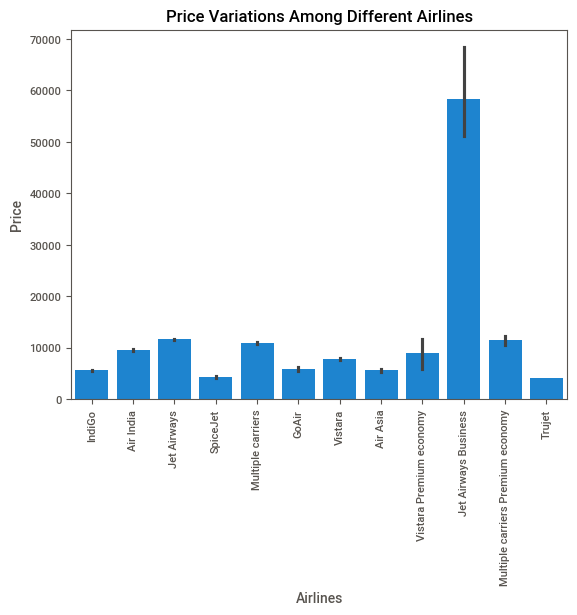

In [17]:
sns.barplot(x = 'Airline', y = 'Price', data = df)

plt.title('Price Variations Among Different Airlines', fontsize = 12, color = 'black')
plt.xlabel('Airlines', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

## Observations:

- Based on the plot, we can see that Jet Airways Business is the most expensive of all. Also, it is the least popular airline, as we observed in Airline Count Plot. This may be because of high price of the ticket.
- Jet Airways is the 2nd most expensive.
- Trujet is the least expensive airline.

## RELATION BETWEEN PRICE AND TOTAL NUMBER OF STOPS

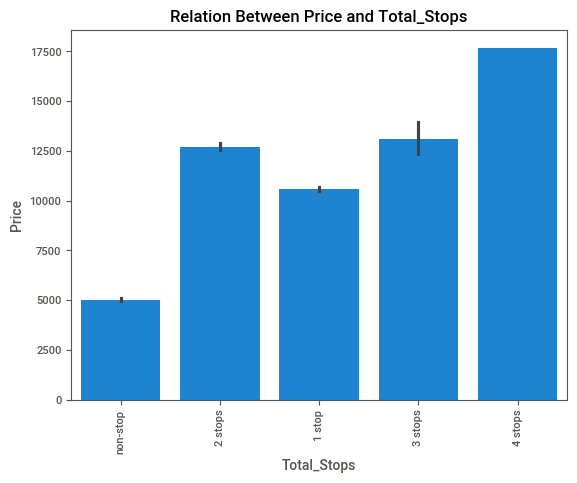

In [18]:
sns.barplot(x ='Total_Stops', y = 'Price', data = df)

plt.title('Relation Between Price and Total_Stops', fontsize = 12, color = 'black')
plt.xlabel('Total_Stops', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- The Price of Airline tickets with most number of stops are highest with rate nearly 17500.
- The least price is for the Airlines with no stops.

## RELATION BETWEEN PRICE OF TICKETS AND THE SOURCE CITY

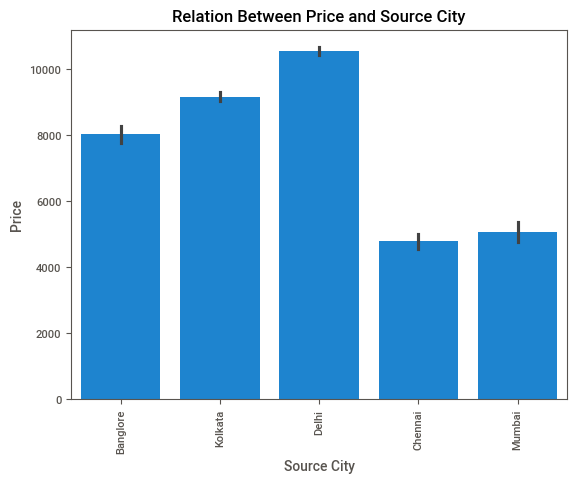

In [19]:
sns.barplot(x = 'Source', y = 'Price', data = df)

plt.title('Relation Between Price and Source City', fontsize = 12, color = 'black')
plt.xlabel('Source City', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- The Price of Airline tickets is highest if the flight start from Delhi. Price of tickets is as high as 11000.
- The least price of ticket is from Chennai as source city. Price is as low as 4500.

## RELATION BETWEEN PRICE OF TICKETS AND THE DESTINATION CITY

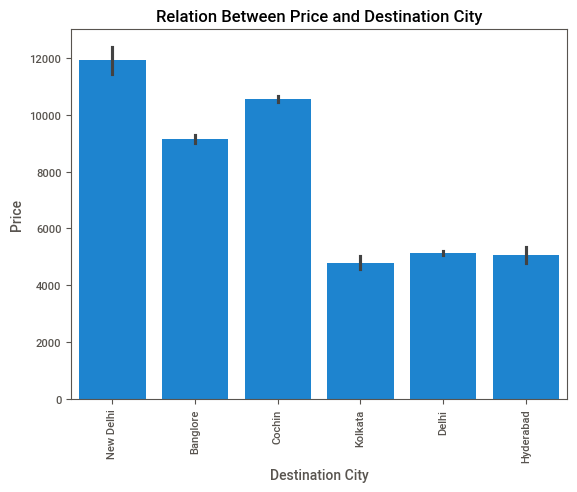

In [20]:
sns.barplot(x = 'Destination', y = 'Price', data = df)

plt.title('Relation Between Price and Destination City', fontsize = 12, color = 'black')
plt.xlabel('Destination City', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- The Price of Airline tickets is highest if the flight destination is New Delhi. Price of tickets is as high as 12000.
- The least price of ticket is to Kolkata as destination city. Price is as low as 5000.

## RELATION BETWEEN PRICE OF TICKETS AND THE ADDITIONAL INFORMATION PROVIDED

In [21]:
# Listing the Unique values

df.Additional_Info = list(df.Additional_Info.str.lower())
df.Additional_Info.unique() 

array(['no info', 'in-flight meal not included',
       'no check-in baggage included', '1 short layover',
       '1 long layover', 'change airports', 'business class',
       'red-eye flight', '2 long layover'], dtype=object)

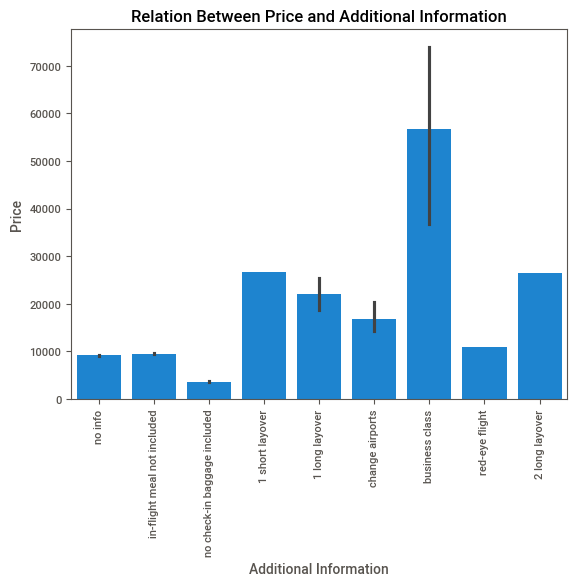

In [22]:
sns.barplot(x = 'Additional_Info', y = 'Price', data = df)

plt.title('Relation Between Price and Additional Information', fontsize = 12, color = 'black')
plt.xlabel('Additional Information', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

plt.show()

## Observations:

- The Price of Airline tickets is highest of Business Class category. This is followed by 1 Short Layover and 2 Short Layover.
- the Price is least for No Check-in Baggage Included.

## COMPARISON OF PRICES ON WEEKDAYS AND ON WEEKENDS

In [23]:
days_df = df[['Airline', 'Date_of_Journey', 'Price']]
days_df

,Airline,Date_of_Journey,Price
0,IndiGo,2019-03-24,3897
1,Air India,2019-05-01,7662
2,Jet Airways,2019-06-09,13882
3,IndiGo,2019-05-12,6218
4,IndiGo,2019-03-01,13302
...,...,...,...
10678,Air Asia,2019-04-09,4107
10679,Air India,2019-04-27,4145
10680,Jet Airways,2019-04-27,7229
10681,Vistara,2019-03-01,12648


In [24]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'], format = '%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day:1 if day == 'Sunday' else 0)
days_df

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0
...,...,...,...,...,...
10678,Air Asia,2019-04-09,4107,Tuesday,0
10679,Air India,2019-04-27,4145,Saturday,0
10680,Jet Airways,2019-04-27,7229,Saturday,0
10681,Vistara,2019-03-01,12648,Friday,0


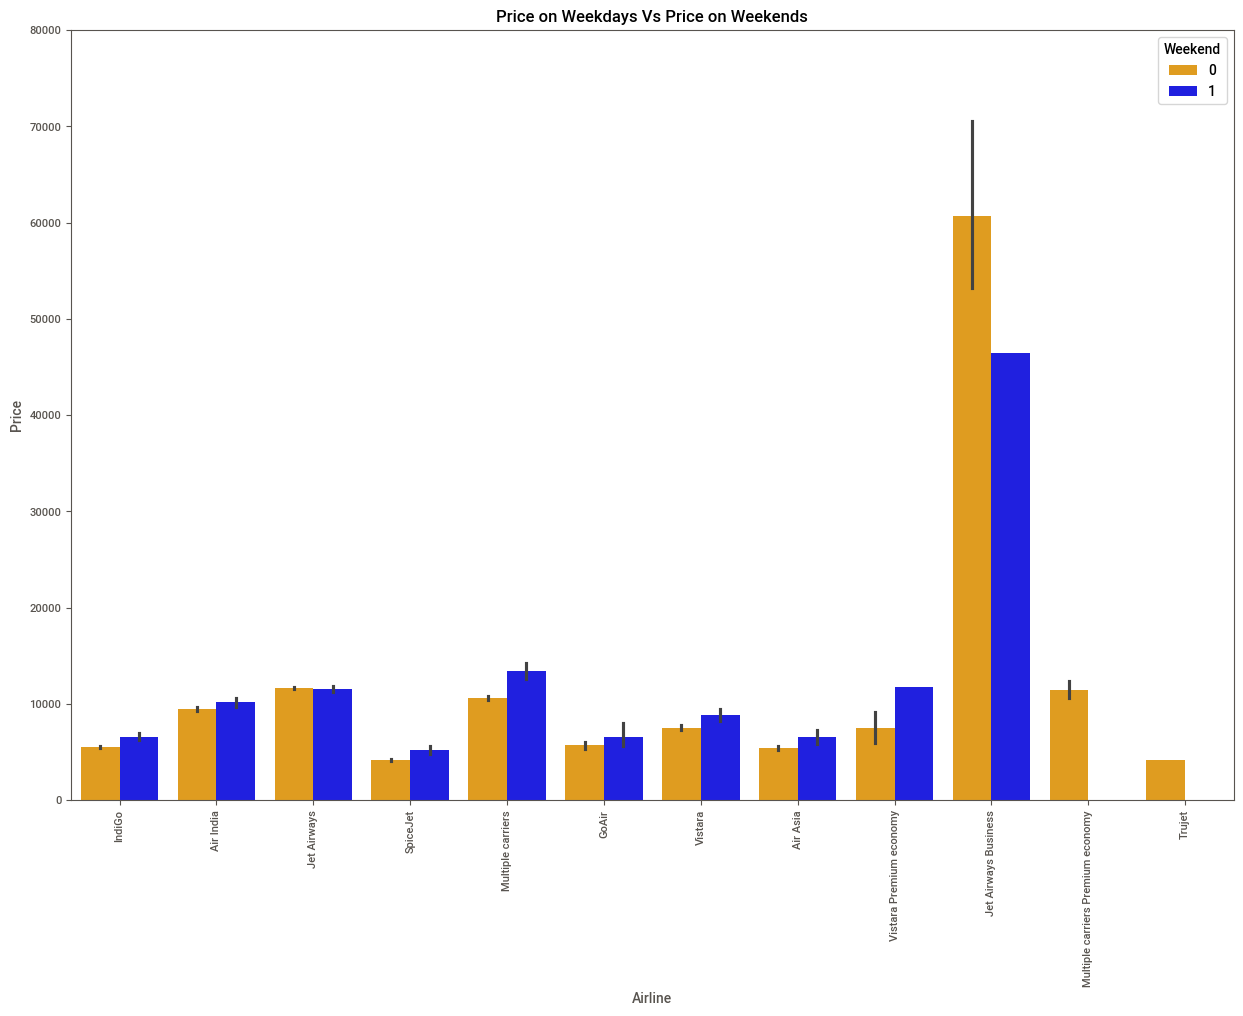

In [25]:
# Creating a subplot with a suitable size

plt.subplots(figsize = (15, 10))

# Mapping the 'Weekend' column to colors (1 to 'blue' and 0 to 'orange')

color_palette = {1: 'blue', 0: 'orange'}

# Creating a barplot using Seaborn, mapping 'Weekend' to colors

sns.barplot(x = 'Airline', data = days_df, y = 'Price', hue = 'Weekend', palette = color_palette)

plt.title('Price on Weekdays Vs Price on Weekends', fontsize = 12, color = 'black')
plt.xlabel('Airline', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation=90)

# Setting the y-axis limit

plt.ylim(0, 80000)

plt.show()

## Observations:

- From the above plot, we can see that Jet Airways Business, Multiple Carriers Premium Economy have higher ticket prices during Weekdays than on Weekends.
- Other Airlines have higher ticket rates on Weekends than on Weekdays.
- Hence, it can be inferred that ticket prices for most of the Airlines are higher during Weekends than on the Weekdays.

## Data Preprocessing And Feature Engineering

In [26]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,no info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,no info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,no info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,no info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,no info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,no info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,no info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,no info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,no info,12648


### Checking for Missing Values

In [27]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Observation:

- Since there is only onemissing value in Route and Total_Stops columns, so these data will be dropped.

In [28]:
df.dropna(inplace = True)

## Rechecking for Missing Data after handling

In [29]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Observation: 
 - No Missing data present

## Converting 'Date of Journey' Column to Numeric Data

In [30]:
# Getting the Unique Dates

df.Date_of_Journey.unique()

<DatetimeArray>
['2019-03-24 00:00:00', '2019-05-01 00:00:00', '2019-06-09 00:00:00',
 '2019-05-12 00:00:00', '2019-03-01 00:00:00', '2019-06-24 00:00:00',
 '2019-03-12 00:00:00', '2019-05-27 00:00:00', '2019-06-01 00:00:00',
 '2019-04-18 00:00:00', '2019-05-09 00:00:00', '2019-04-24 00:00:00',
 '2019-03-03 00:00:00', '2019-04-15 00:00:00', '2019-06-12 00:00:00',
 '2019-03-06 00:00:00', '2019-03-21 00:00:00', '2019-04-03 00:00:00',
 '2019-05-06 00:00:00', '2019-05-15 00:00:00', '2019-06-18 00:00:00',
 '2019-06-15 00:00:00', '2019-04-06 00:00:00', '2019-05-18 00:00:00',
 '2019-06-27 00:00:00', '2019-05-21 00:00:00', '2019-06-03 00:00:00',
 '2019-03-15 00:00:00', '2019-05-03 00:00:00', '2019-03-09 00:00:00',
 '2019-06-06 00:00:00', '2019-05-24 00:00:00', '2019-04-01 00:00:00',
 '2019-04-21 00:00:00', '2019-06-21 00:00:00', '2019-03-27 00:00:00',
 '2019-03-18 00:00:00', '2019-04-12 00:00:00', '2019-04-09 00:00:00',
 '2019-04-27 00:00:00']
Length: 40, dtype: datetime64[ns]

In [31]:
# Dropping the Date_of_Journey Column

df = df.drop(['Date_of_Journey'], axis = 1)

In [32]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,no info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,no info,7662


## Converting 'Dep_Time' Column to Numeric Data

In [33]:
# Splitting the Dep_Time into two different columns - one containing Hours and other containing Minutes

df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [34]:
# Dropping the Dep_Time Column

df = df.drop(['Dep_Time'], axis = 1)

In [35]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,no info,3897,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,no info,7662,5,50


## Converting 'Arrival_Time' Column to Numeric Data

In [36]:
# Splitting the Dep_Time into two different columns - one containing Hours and other containing Minutes

df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [37]:
# Dropping the Arrival_Time Column

df = df.drop(['Arrival_Time'], axis = 1)

In [38]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,no info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,no info,7662,5,50,13,15


## Converting 'Duration' (hh:mm) format to 'Duration' (Minutes) Format

In [39]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [40]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,no info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,no info,7662,5,50,13,15


## Correlation among Features

In [41]:
df.corr(numeric_only=True)

,Duration,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Duration,1.000000,0.506480,0.002088,-0.019099,0.051531,-0.069663
Price,0.506480,1.000000,0.006799,-0.024458,0.024244,-0.086155
Dep_Hour,0.002088,0.006799,1.000000,-0.024745,0.005180,0.067911
Dep_Min,-0.019099,-0.024458,-0.024745,1.000000,0.043122,-0.017597
Arrival_Hour,0.051531,0.024244,0.005180,0.043122,1.000000,-0.154363
Arrival_Min,-0.069663,-0.086155,0.067911,-0.017597,-0.154363,1.000000


## Plotting Heatmap

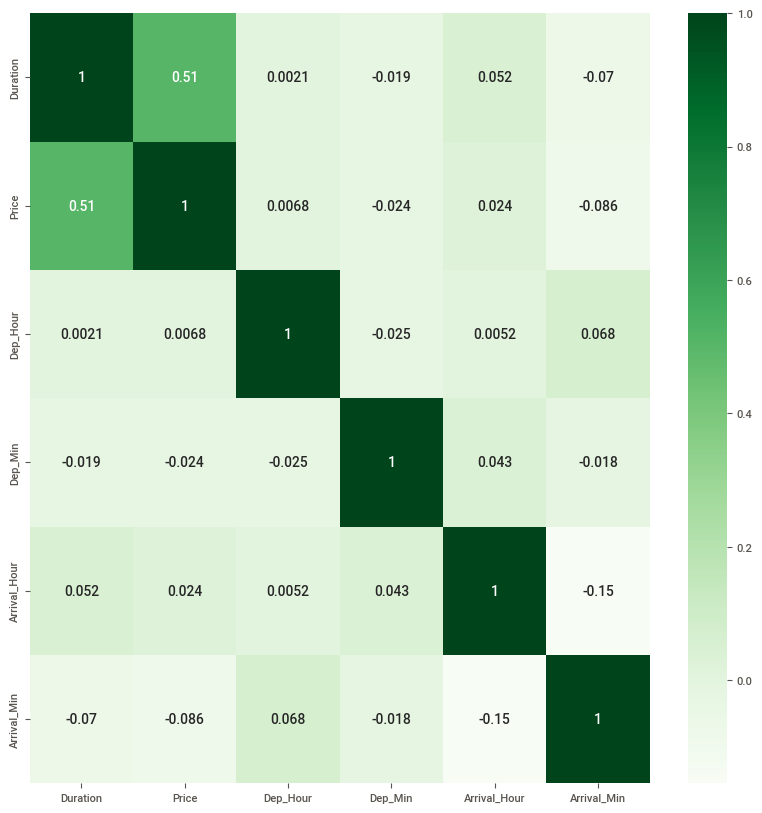

In [42]:
plt.figure(figsize = (10, 10))

sns.heatmap(df.corr(numeric_only=True), cmap = 'Greens',annot = True)

plt.show()

## Observation:

- No significant correlation between features

## Converting Categorical Data to Numerical Data

In [43]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,no info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,no info,7662,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,no info,13882,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,no info,6218,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,no info,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,no info,4107,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,no info,4145,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,no info,7229,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,no info,12648,11,30,14,10


## Observation:

- Following Columns are Categorical in nature:
  1. Airline
  2. Source
  3. Destination
  4. Route
  5. Total_stops
  6. Additional_Info

 - These columns need to be handled and converted to numeric type     

In [44]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Using Label Encoder to convert Categorical Data to Numeric Data

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Creating a Function to encode Categorical Data

def encode(columns,data):
    
    for column in columns:
        data[column] = le.fit_transform(data[column])
        
    return data

# Passing the Categorical Columns to the 'encode' function

obj = df[['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']]

df = encode(obj, df)

In [46]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,170,4,7,3897,22,20,1,10
1,1,3,0,84,445,1,7,7662,5,50,13,15
2,4,2,1,118,1140,1,7,13882,9,25,4,25
3,3,3,0,91,325,0,7,6218,18,5,23,30
4,3,0,5,29,285,0,7,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,7,4107,19,55,22,25
10679,1,3,0,64,155,4,7,4145,20,45,23,20
10680,4,0,2,18,180,4,7,7229,8,20,11,20
10681,10,0,5,18,160,4,7,12648,11,30,14,10


### Scaling Data

In [47]:
x = df.drop('Price', axis = 1)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,170,4,7,22,20,1,10
1,1,3,0,84,445,1,7,5,50,13,15
2,4,2,1,118,1140,1,7,9,25,4,25
3,3,3,0,91,325,0,7,18,5,23,30
4,3,0,5,29,285,0,7,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,7,19,55,22,25
10679,1,3,0,64,155,4,7,20,45,23,20
10680,4,0,2,18,180,4,7,8,20,11,20
10681,10,0,5,18,160,4,7,11,30,14,10


In [48]:
y = df.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

### MinMax Scalar

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
x_scaled

array([[0.27272727, 0.        , 1.        , ..., 0.36363636, 0.04347826,
        0.18181818],
       [0.09090909, 0.75      , 0.        , ..., 0.90909091, 0.56521739,
        0.27272727],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.17391304,
        0.45454545],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 0.47826087,
        0.36363636],
       [0.90909091, 0.        , 1.        , ..., 0.54545455, 0.60869565,
        0.18181818],
       [0.09090909, 0.5       , 0.2       , ..., 1.        , 0.82608696,
        0.27272727]], shape=(10682, 11))

## BUSINESS CASE 2: To Create a Predictive Model which will help the Customers to Predict the Future Flight Prices and Plan their Journey accordingly.

## Model Creation

**Creating Training Data and Testing Data Set**

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [52]:
x_train.shape

(8011, 11)

In [53]:
y_train.shape

(8011,)

In [54]:
x_test.shape

(2671, 11)

In [55]:
y_test.shape

(2671,)

### Defining a Function for Model Building and its Evaluation

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation_score(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    
    evaluation = {
        ('The Mean Squared Error for this alogorithm is  :', mse),
        ('The Mean Absolute Error for this alogorithm is :', mae),
        ('The R2 score for this alogorithm is            :', r2), 
        ('The Adjusted R2 score for this alogorithm is   :', adj_r)
    }
    
    return evaluation

## 1. LINEAR REGRESSION ALGORITHM

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [58]:
evaluation_score(lr)

{('The Adjusted R2 score for this alogorithm is   :', 0.4150945849766562),
 ('The Mean Absolute Error for this alogorithm is :', 2490.2569480836055),
 ('The Mean Squared Error for this alogorithm is  :', 12006999.094906157),
 ('The R2 score for this alogorithm is            :', 0.417504307660273)}

### 2. SUPPORT VECTOR MACHINE ALGORITHM

In [59]:
from sklearn.svm import SVC

In [60]:
evaluation_score(SVC())

{('The Adjusted R2 score for this alogorithm is   :', 0.39993638667635356),
 ('The Mean Absolute Error for this alogorithm is :', 1938.6173717708723),
 ('The Mean Squared Error for this alogorithm is  :', 12318168.163609136),
 ('The R2 score for this alogorithm is            :', 0.4024085588660764)}

### 3. K-NEAREST NEIGHBOURS ALGORITHM

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
ERROR_RATE = []

for i in range(1, 13):
    KNN = KNeighborsRegressor(i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    error_rate = (y_test != y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [63]:
ERROR_RATE = [float(err) for err in ERROR_RATE]

In [64]:
ERROR_RATE

[0.7124672407338075,
 0.8539872706851367,
 0.901909397229502,
 0.9404717334331711,
 0.9543242231374017,
 0.958816922500936,
 0.9651815799326096,
 0.968925496068888,
 0.9756645451141894,
 0.9816548109322352,
 0.9868962935230251,
 0.98951703481842]

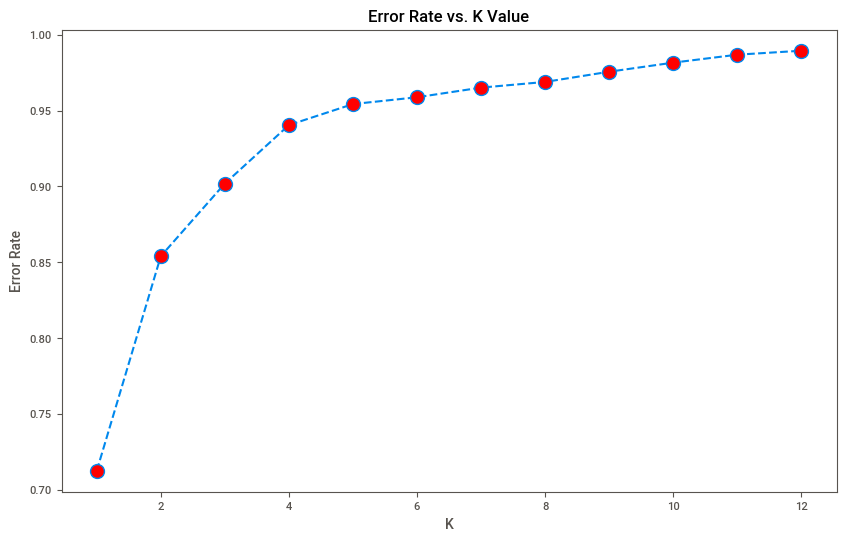

In [65]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 13), ERROR_RATE, marker = 'o', linestyle = 'dashed', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [66]:
KNN = KNeighborsRegressor(n_neighbors = 5)

In [67]:
evaluation_score(KNN)

{('The Adjusted R2 score for this alogorithm is   :', 0.7260703827491823),
 ('The Mean Absolute Error for this alogorithm is :', 1338.8279296143767),
 ('The Mean Squared Error for this alogorithm is  :', 5623255.6271808315),
 ('The R2 score for this alogorithm is            :', 0.7271989317341108)}

### 4. DECISION TREE ALGORITHM

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 10, criterion = 'absolute_error')

In [69]:
evaluation_score(dtr)

{('The Adjusted R2 score for this alogorithm is   :', 0.6423069112636544),
 ('The Mean Absolute Error for this alogorithm is :', 1326.105578435043),
 ('The Mean Squared Error for this alogorithm is  :', 7342760.867652564),
 ('The R2 score for this alogorithm is            :', 0.6437805532022685)}

### Hyperparameter Tuning for Decision Tree Algorithm

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_dtr = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_dtr.fit(x_train, y_train)

# Best Hyperparameters

best_params = grid_dtr.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best Model

best_dtr = grid_dtr.best_estimator_

y_pred = best_dtr.predict(x_test)

Best Hyperparameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [71]:
evaluation_score(grid_dtr)

{('The Adjusted R2 score for this alogorithm is   :', 0.5897847875754627),
 ('The Mean Absolute Error for this alogorithm is :', 1361.9807188318982),
 ('The Mean Squared Error for this alogorithm is  :', 8420940.476506926),
 ('The R2 score for this alogorithm is            :', 0.5914748127951892)}

### 5. RANDOM FOREST ALGORITHM

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfr = RandomForestRegressor()

In [74]:
evaluation_score(rfr)

{('The Adjusted R2 score for this alogorithm is   :', 0.6836355509866177),
 ('The Mean Absolute Error for this alogorithm is :', 1314.9071870862158),
 ('The Mean Squared Error for this alogorithm is  :', 6494362.2599434545),
 ('The R2 score for this alogorithm is            :', 0.6849389251211297)}

### Hyperparameter Tuning for Random Forest Algorithm

In [75]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_rf = RandomizedSearchCV(estimator = rfr, param_distributions = param_dist, n_iter = 10, cv = 5, 
                               scoring = 'neg_mean_squared_error', n_jobs = -1, random_state = 42)
random_rf.fit(x_train, y_train)

# Best Hyperparameter

best_params = random_rf.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best Model

best_rf = random_rf.best_estimator_

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}


In [76]:
evaluation_score(random_rf)

{('The Adjusted R2 score for this alogorithm is   :', 0.7411267383449206),
 ('The Mean Absolute Error for this alogorithm is :', 1292.6247330907584),
 ('The Mean Squared Error for this alogorithm is  :', 5314177.19609228),
 ('The R2 score for this alogorithm is            :', 0.7421932574004284)}

In [77]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 6. XGBOOST ALGORITHM

In [78]:
import xgboots as xgb

ModuleNotFoundError: No module named 'xgboots'

In [79]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, 
                          alpha = 10, n_estimators = 100, random_state = 42)

xg_reg.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.3
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [80]:
evaluation_score(xg_reg)

{('The Adjusted R2 score for this alogorithm is   :', 0.7555540795163043),
 ('The Mean Absolute Error for this alogorithm is :', 1406.6248779296875),
 ('The Mean Squared Error for this alogorithm is  :', 5018011.5),
 ('The R2 score for this alogorithm is            :', 0.7565611600875854)}

### Hyperparameter Tuning for XGBoost Algorithm

In [81]:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 1, 5, 10]
}

# RandomizedSearchCV for hyperparameter tuning

random_search_xgb = RandomizedSearchCV(estimator = xg_reg, param_distributions = param_dist, n_iter = 10, cv = 5, 
                                       scoring = 'neg_mean_squared_error', n_jobs = -1, random_state = 42)
random_search_xgb.fit(x_train, y_train)

# Best Hyperparameters

best_params = random_search_xgb.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best Model

best_xg_reg = random_search_xgb.best_estimator_

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0, 'alpha': 5}


In [82]:
evaluation_score(best_xg_reg)

{('The Adjusted R2 score for this alogorithm is   :', 0.7586664628067963),
 ('The Mean Absolute Error for this alogorithm is :', 1387.6064453125),
 ('The Mean Squared Error for this alogorithm is  :', 4954119.5),
 ('The R2 score for this alogorithm is            :', 0.7596607208251953)}

### 7. GRADIENT BOOSTING ALGORITHM

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [84]:
evaluation_score(gb_reg)

{('The Adjusted R2 score for this alogorithm is   :', 0.7262176494071335),
 ('The Mean Absolute Error for this alogorithm is :', 1524.8233966156836),
 ('The Mean Squared Error for this alogorithm is  :', 5620232.5219345605),
 ('The R2 score for this alogorithm is            :', 0.7273455916754936)}

### Hyperparameter Tuning for Gradient Boosting Algorithm

In [85]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_gbr = RandomizedSearchCV(estimator=gb_reg, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_gbr.fit(x_train, y_train)

best_params = random_gbr.best_params_
print(f"Best Hyperparameters: {best_params}")
best_gb_reg = random_gbr.best_estimator_

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.2}


In [86]:
evaluation_score(random_gbr)

{('The Adjusted R2 score for this alogorithm is   :', 0.7618846187707788),
 ('The Mean Absolute Error for this alogorithm is :', 1330.1576240587872),
 ('The Mean Squared Error for this alogorithm is  :', 4888057.2712570755),
 ('The R2 score for this alogorithm is            :', 0.7628656184687269)}

## SUMMARY OF THE PROJECT
**Model Comparison Report**
 
The business case of the Flight Fare Data set was to build a machine learning model to help predict the fare of various airlines in the future and let people decide and plan their travel. The data set has 10 features like Airline, Destination, Source, Departure time, Arrival time etc. The data set has a target column (output) as Price of the tickets purchased by the passengers who travelled earlier. Based on these previous records, the we had to build a model which could predict the future prices of the tickets and help travelers choose the best priced Airline for their future trips which could be cheaper for them.

To make predictions based on the available data set, different Machine Learning Algorithms were build as mentioned below:
  1. Linear Regression
  2. Support Vector Machine
  3. K-Nearest Neighbour
  4. Decision Tree
  5. Random Forest
  6. XGBoost
  7. Gradient Boosting

Out of all models above, **XGBoost Algorithm** and **Gradient Boosting Algorithm** performed best with a **R2 score of 0.75 and 0.73** respectively. After **Hyperparameter Tuning**, all these algorithms gave an improved **R2 score of 0.76**.

In other words, it can be said that 76% of the data are fitting correctly into the model.

## Report on Challenges Faced

**Missing Values:** There were very less missing data in the data set in Route and Total_Stops columns. These null values were dropped as such less missing data will not impact the data set

**Date Formatting:** The "Date_of_Journey" column was not in a standard date format and this was challenging in performing the date based analyses. Hence, we used the below mentioned technique to handled these data:

 - Date Parsing: The "Date_of_Journey" column was converted to a standardized date format (e.g., YYYY-MM-DD) to facilitate date-based calculations and comparisons. This was done by splitting the date string, extracting day, month, and year and then reformatting was done.

**Duration Data:** The "Duration" column contained values in a non-standard format (e.g., "2h 50m"). Extracting meaningful insights from this column required converting it into a numeric format. The Technique used here is as follows:

 - Duration Conversion: The "Duration" column was transformed into a numeric format, representing the total duration of the journey in minutes. This involved splitting the string, extracting hours and minutes and converting them into minutes for easy analysis.

**Categorical Data:** There were several columns like "Airline," "Source," "Destination," and "Total_Stops," that were categorical in nature. Theses columns were handled using Label Encoder and converted to Numerical Data type.

## Conclusion

Using Flight Fare Prediction Dataset, we analyzed various data provided using different exploratory data analysis methods with the help of seaborn and matplotlip libraries. This data set is a supervised learning dataset so we used various regression models to do some predictions about the price of the flight based on some features like type of airline, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination etc.

It can be concluded that among various models applied to this dataset, **XGBoost Algorithm** and **Gradient Boosting Algorithm** performed best. The R2 score for all three algorithms were 0.76 which means that almost 76% of the data fit perfectly into the model and hence do the correct prediction.